PCA Analysis


In [2]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.colors as colors
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA


In [3]:
df = pd.read_csv(r'D:/PYTHON/heart_disease.csv', sep=";")
print(df.head())

    age  sex   cp  trestbps    cho  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  target  
0    3.0  0.0   6.0    0       1  
1    2.0  3.0   3.0    2       1  
2    2.0  2.0   7.0    1       1  
3    3.0  0.0   3.0    0       1  
4    1.0  0.0   3.0    0       1  


In [4]:
print (df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   cho       303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
 14  target    303 non-null    int64  
dtypes: float64(13), int64(2)
memory usage: 35.6 KB
None


In [5]:
print(df.describe())

              age         sex          cp    trestbps         cho         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.683168   
std      0.994971   22.8750

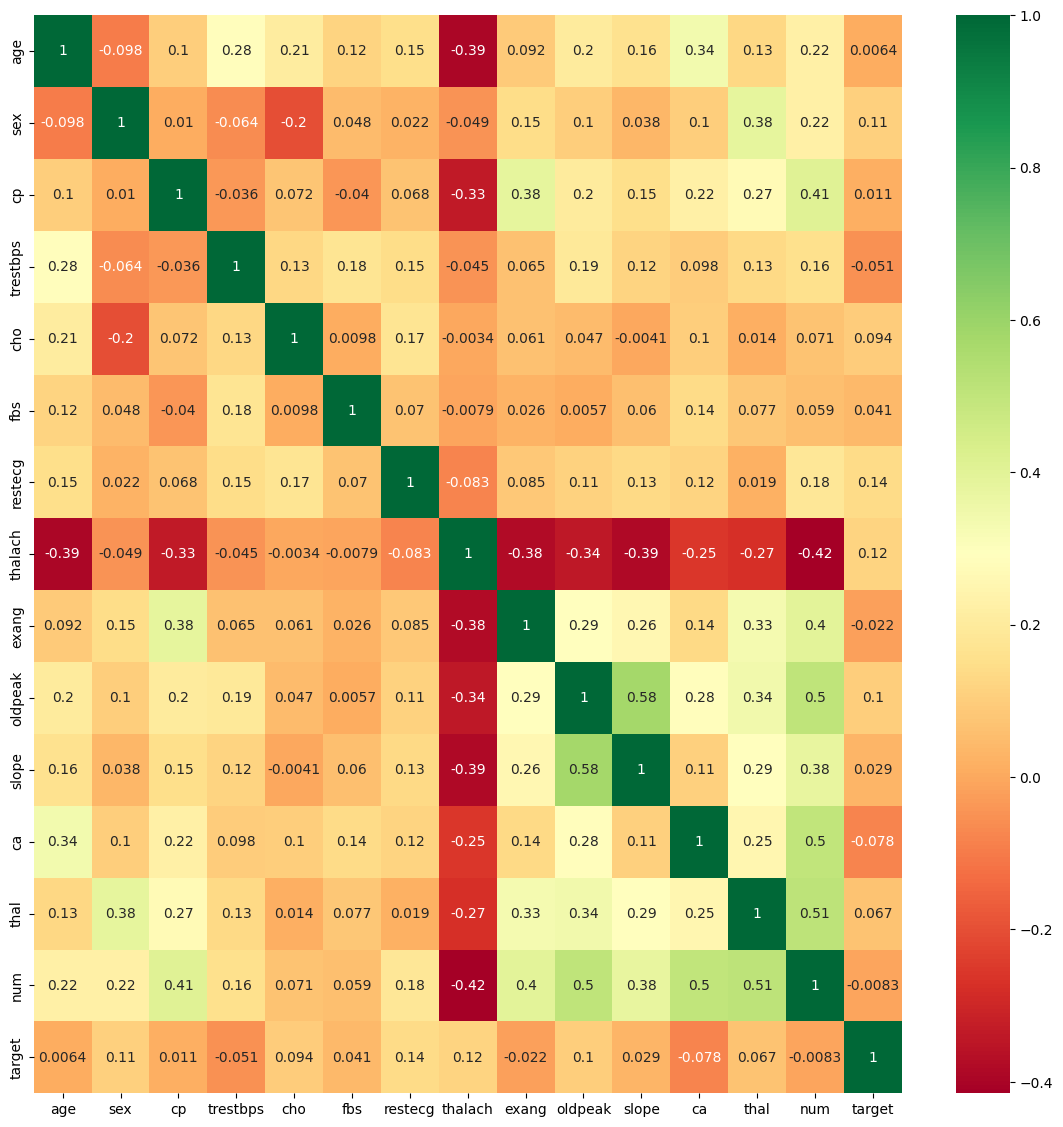

In [8]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,14))
#plot heat map
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

In [7]:
print(df['target'].value_counts())

x = df.iloc[:,:-1]
Y = df['target']

print(x.head())
print(Y.head())
from sklearn.model_selection import train_test_split
x_train, x_test,Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state= 2)
print(x.shape)
print(x_train.shape)
print(x_test.shape)


target
1    167
0    136
Name: count, dtype: int64
    age  sex   cp  trestbps    cho  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    2  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0  
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64
(303, 14)
(242, 14)
(61, 14)


In [10]:
#random state - to randomly split -- coulld be anything randomly

X_train, X_test, y_train, y_test = train_test_split(x, Y, random_state=42) 
#Normaisation basically
X_train_scaled = scale(X_train) 
X_test_scaled = scale(X_test)
df_svm = SVC(random_state=42) 
print(df_svm.fit(X_train_scaled, y_train))
print(x_train, X_train.shape)
print(x_test, X_test.shape)
print(X_test_scaled, X_test_scaled.shape)


SVC(random_state=42)
      age  sex   cp  trestbps    cho  fbs  restecg  thalach  exang  oldpeak  \
237  46.0  1.0  4.0     120.0  249.0  0.0      2.0    144.0    0.0      0.8   
106  59.0  1.0  4.0     140.0  177.0  0.0      0.0    162.0    1.0      0.0   
10   57.0  1.0  4.0     140.0  192.0  0.0      0.0    148.0    0.0      0.4   
153  55.0  1.0  4.0     160.0  289.0  0.0      2.0    145.0    1.0      0.8   
77   51.0  0.0  3.0     140.0  308.0  0.0      2.0    142.0    0.0      1.5   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
75   65.0  0.0  3.0     160.0  360.0  0.0      2.0    151.0    0.0      0.8   
22   58.0  1.0  2.0     120.0  284.0  0.0      2.0    160.0    0.0      1.8   
72   62.0  1.0  4.0     120.0  267.0  0.0      0.0     99.0    1.0      1.8   
15   57.0  1.0  3.0     150.0  168.0  0.0      0.0    174.0    0.0      1.6   
168  35.0  1.0  4.0     126.0  282.0  0.0      2.0    156.0    1.0      0.0   

     slope   ca  thal  num  
2

In [13]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [11]:
# PCA
new_columns = [col.replace(' ','_') for col in df.columns]
df.columns = new_columns

In [14]:
print(df.columns)
num_features = len(df.columns) - 1
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Index(['age', 'sex', 'cp', 'trestbps', 'cho', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'target'],
      dtype='object')


In [15]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigen vals: {}'.format(eigen_vals))

Eigen vals: [3.94706343 1.54175119 1.26140405 0.32557126 0.34023619 0.39762843
 0.42876813 0.54613147 1.10262999 0.71304333 0.95438275 0.89866376
 0.78738218 0.82169456]


In [16]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

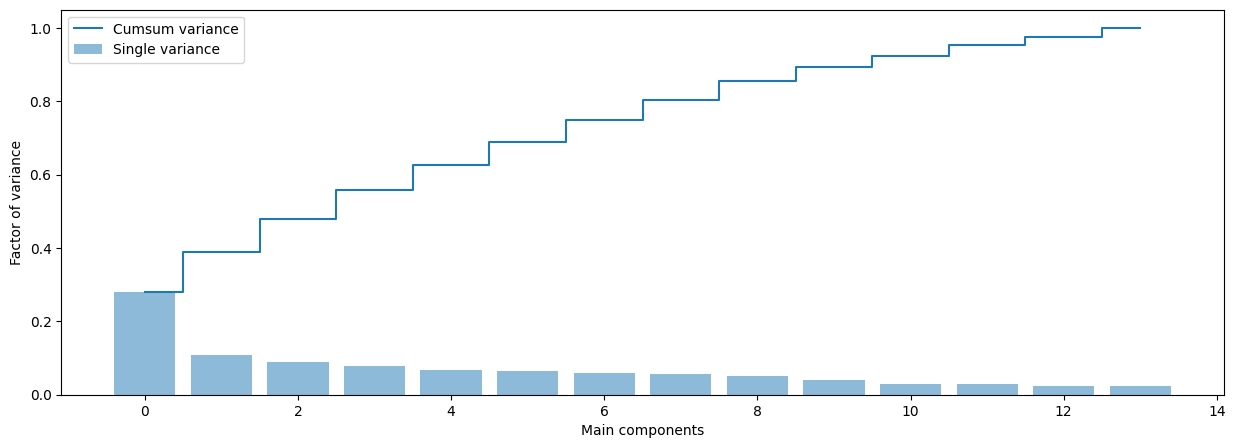

In [17]:
plt.figure(figsize=(15,5))
plt.bar(range(num_features), var_exp, alpha=.5, align='center', label='Single variance')
plt.step(range(num_features), cum_var_exp, where='mid', label='Cumsum variance')
plt.ylabel('Factor of variance')
plt.xlabel('Main components')
plt.legend(loc='best')
plt.show()

In [18]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key = lambda k: k[0], reverse=True)
W = np.hstack((eigen_pairs[0][1][:, np.newaxis], 
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W: \n{}'.format(W))

X_train_pca = X_train_std.dot(W)
X_test_pca = X_test_std.dot(W)


Matrix W: 
[[ 0.29841963 -0.3083782 ]
 [ 0.09874118  0.60097175]
 [ 0.26879869  0.08761359]
 [ 0.12571565 -0.25615977]
 [ 0.08535948 -0.46539897]
 [ 0.0433043   0.0279348 ]
 [ 0.15048066 -0.2769347 ]
 [-0.33641973  0.04800764]
 [ 0.27867344  0.12960921]
 [ 0.36479173 -0.06055745]
 [ 0.31445883 -0.14398356]
 [ 0.31584184  0.05853315]
 [ 0.30368271  0.34093321]
 [ 0.40811649  0.11493102]]
